Wie unterscheiden sich die Bewertungen der Kandidaten und die der Bols?

In [4]:
# Laden einiger Bibliotheken
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Grafik style
sns.set_style("whitegrid")

In [5]:
# lade den Datensatz
df = pd.read_csv("../data/bewertungen.csv")

# füge eine Spalte mit der Bolwertung hinzu
#df["Bolwertung"] = round(df[["M", "A", "C"]].mean(axis=1) * 4)

df.tail(10)

,WochenID,FolgenID,Ausstrahlung,Reaction,Ort,K1,K2,K3,K4,K5,Summe,M,A,C,Bolwertung,Person,Geschlecht,Alter,Schlafrock?,YT-Link
54,12,1453,07.11.2011,02.12.2025,Münster,NaN,8.0,8.0,10.0,7.0,33,7.0,6.0,7.0,20.0,Palitha,m,NaN,0,https://youtu.be/pRPLkWlRufU
55,12,1454,08.11.2011,02.12.2025,Münster,7.0,NaN,8.0,7.0,9.0,31,7.0,8.0,7.0,22.0,Birgit,w,NaN,0,https://youtu.be/1eJY-Y4OKkw
56,12,1455,09.11.2011,02.12.2025,Münster,5.0,5.0,NaN,5.0,4.0,19,5.0,6.0,5.0,16.0,Heike,w,27.0,0,https://youtu.be/2Eoo8Ok3vYc
57,12,1456,10.11.2011,03.12.2025,Münster,6.0,6.0,10.0,NaN,6.0,28,5.0,3.0,5.0,13.0,Andreas,m,42.0,0,https://youtu.be/kNcidz7M_Vs
58,12,1457,11.11.2011,03.12.2025,Münster,7.0,7.0,6.0,5.0,NaN,25,8.0,8.0,8.0,24.0,Igbale,w,41.0,0,https://youtu.be/dXd8xvZgsk4
59,13,1728,03.12.2012,14.01.2026,NaN,NaN,8.0,7.0,7.0,7.0,29,NaN,8.0,8.0,24.0,Stefanie,w,39.0,0,https://youtu.be/NmkETvROM10
60,13,1729,04.12.2012,14.01.2026,NaN,10.0,NaN,7.0,8.0,8.0,33,NaN,9.0,9.0,27.0,Margret,w,57.0,0,https://youtu.be/v2yjM9dDfbw
61,13,1730,05.12.2012,15.01.2026,NaN,6.0,8.0,NaN,9.0,9.0,32,7.0,7.0,6.0,20.0,Harald,m,62.0,0,https://youtu.be/lKMF4AQv4mQ
62,13,1731,06.12.2012,15.01.2026,NaN,10.0,8.0,6.0,NaN,7.0,31,7.0,8.0,8.0,23.0,Adrien,m,27.0,0,https://youtu.be/DWvquF5F-so
63,13,1732,07.12.2012,15.01.2026,NaN,5.0,7.0,6.0,7.0,NaN,25,6.0,6.0,5.0,17.0,Michaela,w,44.0,0,https://youtu.be/iHdfyYhuN_w


In [6]:
def plot_ddd_vs_dpd(data, axis_min=None, axis_range=(10, 40)):
    # WochenID der letzten Woche
    last_week = data["WochenID"].max()

    # colors = ["0.4" for _ in range(len(df) - 6)] + ["r" for _ in range(5)]

    # scatterplot
    g = sns.scatterplot(
        data=df,
        x="Summe",
        y="Bolwertung",
        hue=data["WochenID"] == last_week,
        # hue="WochenID",
        palette=sns.color_palette(n_colors=2),
    )

    # title
    g.set_title("Wertung Kandidaten vs Bols")

    # achsen
    g.set_xlim(axis_range)
    g.set_ylim(axis_range)
    g.set_aspect("equal", adjustable="box")
    g.set_xlabel("Kandidaten")
    g.set_ylabel("Bols")

    # füge diagonale linie hinzu
    linespace = np.linspace(*axis_range)
    sns.lineplot(x=linespace, y=linespace, color="grey", alpha=0.5)

    # legende
    g.legend(title="Woche")

    # highlighte wichtige datenpunkte
    for index, row in df.iterrows():
        # perfektes dinner
        if row["Summe"] >= 35 and row["Bolwertung"] >= 35:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="g",
            )

        # katastrophen dinner
        if row["Summe"] <= 15 or row["Bolwertung"] <= 15:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="r",
            )

        # aktuelle woche
        elif row["WochenID"] == last_week:
            g.annotate(row["Person"], (row["Summe"], row["Bolwertung"]), size=8)

    return g


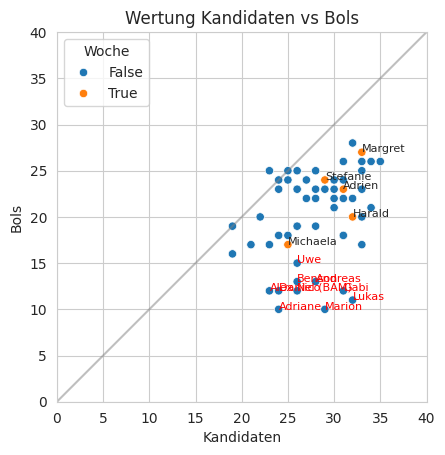

In [7]:
plot = plot_ddd_vs_dpd(df, axis_range=(0,40))

#plot.get_figure().savefig("out.png", dpi=200)